<a href="https://colab.research.google.com/github/BlueBlazin/nlp_from_ground_up/blob/master/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np

In [63]:
def softmax(x):
    x -= np.max(x)
    x = np.exp(x)
    return x / np.sum(x)

In [64]:
def cross_entropy(t, pred):
    target = np.zeros_like(pred)
    target[t] = 1
    return -np.sum(target * np.log(pred))

In [65]:
def loss_fn(ts, ys):
    return sum(cross_entropy(t, y) for t, y in zip(ts, ys)) / len(ts)

In [66]:
def rnn_cell(x, hprev, Wx, Wh, bh):
    return np.tanh(Wx @ x + Wh @ hprev + bh)

In [67]:
def forward_pass(xs, h, Wx, Wh, bh, Wy, by):
    hs = []
    ys = []

    for x in xs:
        h = rnn_cell(x, h, Wx, Wh, bh)
        hs.append(h)

        y = softmax(Wy @ h + by)
        ys.append(y)

    return ys, hs

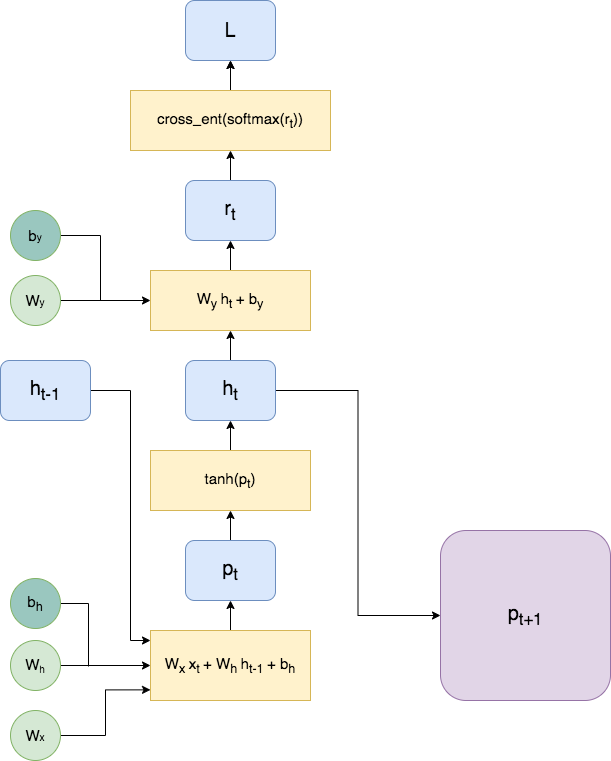

In [68]:
def backward_pass(xs, ys, hs, ts, Wy, by, Wx, Wh, bh):
    dWy = np.zeros_like(Wy)
    dby = np.zeros_like(by)

    dWx = np.zeros_like(Wx)

    dWh = np.zeros_like(Wh)
    dbh = np.zeros_like(bh)

    dpnext = np.zeros_like(hs[0])

    for t in reversed(range(len(ys))):
        y = ys[t]
        h = hs[t]
        x = xs[t]
        hprev = hs[t - 1]

        dr = y.copy()
        dr[ts[t]] -= 1

        dh = Wy.T @ dr + Wh @ dpnext

        dWy += dr @ h.T
        dby += dr

        dp = (1 - h * h) * dh

        dWx += dp @ x.T

        dWh += dp @ hprev.T
        dbh += dp

        dpnext = dp.copy()

    return dWy, dby, dWx, dWh, dbh

In [69]:
xs = [np.array([[1, 0, 0, 0]]).T, np.array([[0, 1, 0, 0]]).T, np.array([[0, 0, 1, 0]]).T]

# ts = [np.array([[0, 1, 0, 0]]).T, np.array([[0, 0, 1, 0]]).T, np.array([[0, 0, 0, 1]]).T]
ts = [1, 2, 3]

Wx = np.random.randn(3, 4)

Wh = np.random.randn(3, 3)
bh = np.random.randn(3, 1)

Wy = np.random.randn(4, 3)
by = np.random.randn(4, 1)

hzero = np.zeros((3, 1))

In [74]:
alpha = 0.01

for i in range(5000):
    ys, hs = forward_pass(xs, hzero, Wx, Wh, bh, Wy, by)
    hs.append(hzero)

    if i % 500 == 0:
        print(loss_fn(ts, ys))

    dWy, dby, dWx, dWh, dbh = backward_pass(xs, ys, hs, ts, Wy, by, Wx, Wh, bh)

    Wy -= alpha * dWy
    by -= alpha * dby

    Wx -= alpha * dWx

    Wh -= alpha * dWh
    bh -= alpha * dbh

0.12589454316873946
0.09448482876334287
0.07543748334144772
0.0626803623372675
0.05355386585862417
0.046709170161196654
0.041390103142148825
0.03714035418393872
0.03366851199823701
0.03077989539264847
0.028339575862417376
0.02625113472687605
0.024443868237709693
0.022864768696702138
0.021473325702265355
0.020238055741120864
0.01913412569003356
0.0181416884660366
0.01724469396806665
0.016430024324468905
0.01568685485018276
0.015006174920146276
0.014380423989103818
0.013803211749379698
0.013269100600112577
0.012773434835874078
0.012312205264047624
0.01188194097219678
0.01147962210440571
0.011102609042134273
0.010748584502575848
0.010415505889032511
0.01010156583799146
0.009805159365076465
0.009524856358165872
0.009259378430008356
0.009007579345702321
0.008768428397681997
0.008540996223561631
0.008324442658544507
0.008118006290265234
0.00792099544447195
0.00773278037836812
0.007552786497350277
0.007380488442317992
0.0072154049202716175
0.007057094171737758
0.006905149985637268
0.006759198